<a href="https://colab.research.google.com/github/julballa/LatentLattice/blob/main/Lattice_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install lattpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 880.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.5/458.5 kB 4.2 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


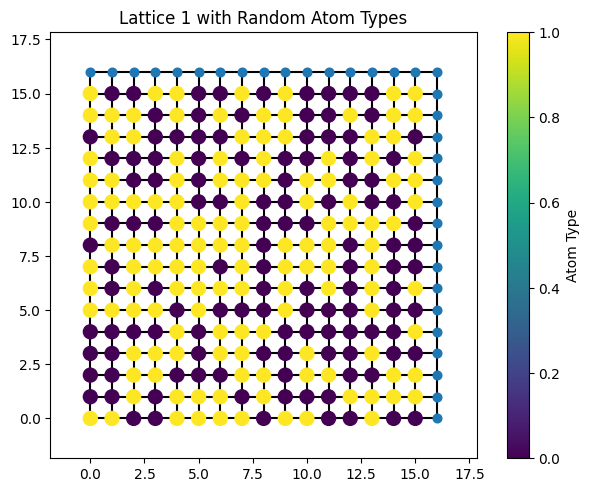

File successfully saved to /content/drive/MyDrive/MyLatticeData/lattice_1.pkl


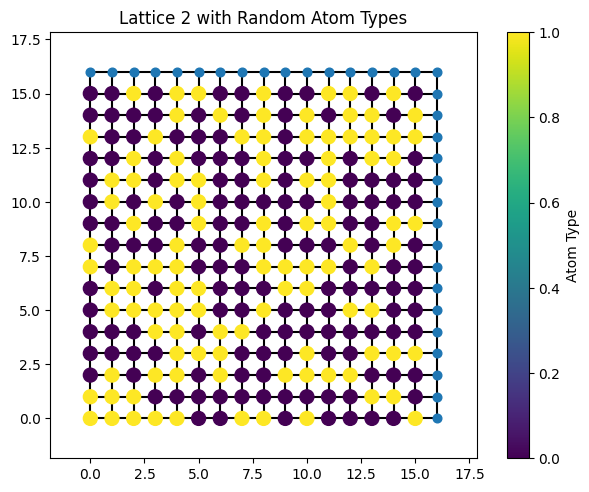

File successfully saved to /content/drive/MyDrive/MyLatticeData/lattice_2.pkl


In [9]:
import pickle
import numpy as np
from lattpy import simple_square
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive')
save_directory = '/content/drive/MyDrive/MyLatticeData'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

def save_lattice(lattice, atom_types, filename):
    try:
        save_path = os.path.join(save_directory, filename)
         # Pack lattice and atom types into a dictionary
        data = {
            'lattice': lattice,
            'atom_types': atom_types
        }
        # Save using pickle
        with open(save_path, 'wb') as f:
            pickle.dump(data, f)

            print(f"File successfully saved to {save_path}")
    except Exception as e:
        print(f"Failed to save file: {e}")


def create_dataset(num_lattices, shape):
    lattices = []
    atom_types_list = []

    for i in range(num_lattices):
        # Initialize and build the lattice
        latt = simple_square()
        latt.build(shape=shape)

        # Generate random atom types for each node
        atom_types = np.random.randint(0, 2, size=np.prod(shape))  # Two atom types: 0 and 1

        # Store the lattice and the atom types
        lattices.append(latt)
        atom_types_list.append(atom_types)

        # Plot the lattice with atom type color mapping
        fig, ax = plt.subplots()
        latt.plot(ax=ax, lw=None, margins=0.1, legend=None, grid=False, pscale=0.5, show_periodic=True,
                  show_indices=False, index_offset=0.1, con_colors=None, adjustable='box', show=False)

        # Generate indices for getting positions
        indices = np.indices(shape).reshape(2, -1).T
        indices = np.hstack((indices, np.zeros((indices.shape[0], 1), dtype=int)))  # alpha = zero

        # Get positions for these indices
        positions = latt.get_positions(indices)

        # Add color to the nodes based on atom types
        scatter = ax.scatter(positions[:, 0], positions[:, 1], c=atom_types, cmap='viridis', s=100)
        plt.colorbar(scatter, ax=ax, label='Atom Type')

        plt.title(f'Lattice {i + 1} with Random Atom Types')
        plt.show()

        # Save the lattice and atom types to a file
        save_lattice(latt, atom_types, f'lattice_{i+1}.pkl')

    return lattices, atom_types_list

# Parameters
num_lattices = 2
lattice_shape = (16, 16) #256 nodes

# Generate dataset and plot each lattice
dataset, atom_types_dataset = create_dataset(num_lattices, lattice_shape)
